In [76]:
%load_ext autoreload
%autoreload 2
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit,KFold,GridSearchCV
from sklearn.metrics import accuracy_score,fbeta_score,f1_score
import numpy as np
import matplotlib.pyplot as plt
from helpers import make_complexity_curve, make_learning_curve,make_timing_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


**Load Adult Data**

In [77]:
adult_df = pd.read_csv(filepath_or_buffer="adult_cleaned.csv")
adult_df_dummies = pd.get_dummies(adult_df.drop('target', 1))
adult_x = adult_df_dummies.copy().values
adult_y = adult_df["target"].copy().values
X_adult_train, X_adult_test, y_adult_train, y_adult_test = train_test_split(adult_x, adult_y, test_size=0.2,random_state=0)
print(f"adult_df: {adult_df.shape}")
print(f"X_adult_train: {X_adult_train.shape}")
print(f"X_adult_test: {X_adult_test.shape}")
print(f"y_adult_train: {y_adult_train.shape}")
print(f"y_adult_test: {y_adult_test.shape}")
print(f"y_adult_train pos: {(y_adult_train > 0).sum() / len(y_adult_train)}")
print(f"y_adult_train neg: {(y_adult_train == 0).sum() / len(y_adult_train)}")

adult_df: (30162, 15)
X_adult_train: (24129, 104)
X_adult_test: (6033, 104)
y_adult_train: (24129,)
y_adult_test: (6033,)
y_adult_train pos: 0.2489535413817398
y_adult_train neg: 0.7510464586182601


**Load Spam**

In [78]:
spam_df = pd.read_csv('spambase2.csv', header=0)
spam_x = spam_df.drop('class', axis=1)
spam_y = spam_df['class']
X_spam_train, X_spam_test, y_spam_train, y_spam_test = train_test_split(spam_x, spam_y, test_size=0.2,random_state=0)
print(f"spam_df: {spam_df.shape}")
print(f"X_spam_train: {X_spam_train.shape}")
print(f"X_spam_test: {X_spam_test.shape}")
print(f"y_spam_train: {y_spam_train.shape}")
print(f"y_spam_test: {y_spam_test.shape}")
print(f"y_spam_train pos: {(y_spam_train > 0).sum() / len(y_spam_train)}")
print(f"y_spam_train neg: {(y_spam_train == 0).sum() / len(y_spam_train)}")

spam_df: (4601, 58)
X_spam_train: (3680, 57)
X_spam_test: (921, 57)
y_spam_train: (3680,)
y_spam_test: (921,)
y_spam_train pos: 0.38858695652173914
y_spam_train neg: 0.6114130434782609


**Grid Search**

In [79]:
params = {
    'KNN__metric':['manhattan','euclidean','chebyshev'],
    'KNN__n_neighbors':np.arange(1,51,3),
    'KNN__weights':['uniform','distance']
}

In [80]:
pipeAdult = Pipeline([('Scale',StandardScaler()),('KNN',KNeighborsClassifier())])  
adult_cv = GridSearchCV(pipeAdult,param_grid=params, cv=5)
adult_cv.fit(X_adult_train.astype(float), y_adult_train.astype(float))
print(f"best params adult: {adult_cv.best_params_}")

best params adult: {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 46, 'KNN__weights': 'uniform'}


In [81]:
pipeSpam = Pipeline([('Scale',StandardScaler()),('KNN',KNeighborsClassifier())])  
spam_cv = GridSearchCV(pipeSpam,param_grid=params, cv=5)
spam_cv.fit(X_spam_train.astype(float), y_spam_train.astype(float))
print(f"best params spam: {spam_cv.best_params_}")

best params spam: {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 7, 'KNN__weights': 'distance'}


**n_neighbors no scaling**

In [82]:
knn_adult_noscale_manhattan = make_complexity_curve(KNeighborsClassifier(metric='manhattan'), X_adult_train, y_adult_train, "n_neighbors", np.arange(1,51,3),"knn_no_scaling_manhattan", "adult")
knn_adult_noscale_euclidean = make_complexity_curve(KNeighborsClassifier(metric='euclidean'), X_adult_train, y_adult_train, "n_neighbors", np.arange(1,51,3),"knn_no_scaling_euclidean", "adult")
knn_adult_noscale_chebyshev = make_complexity_curve(KNeighborsClassifier(metric='chebyshev'), X_adult_train, y_adult_train, "n_neighbors", np.arange(1,51,3),"knn_no_scaling_chebyshev", "adult")

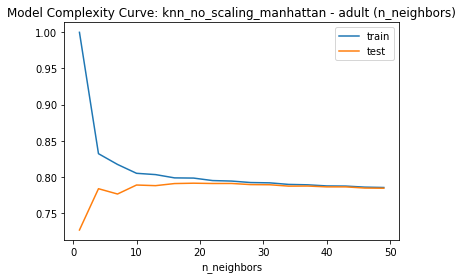

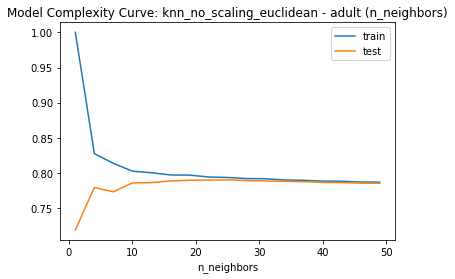

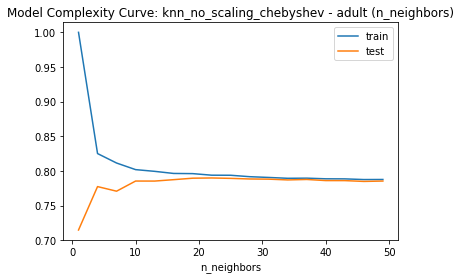

In [83]:
for d in [knn_adult_noscale_manhattan, knn_adult_noscale_euclidean, knn_adult_noscale_chebyshev]:
    d.plot(title=d.name)

In [ ]:
knn_spam_noscale_manhattan = make_complexity_curve(KNeighborsClassifier(metric='manhattan'), X_spam_train, y_spam_train, "n_neighbors", np.arange(1,51,3),"knn_no_scaling_manhattan", "spam")
knn_spam_noscale_euclidean = make_complexity_curve(KNeighborsClassifier(metric='euclidean'), X_spam_train, y_spam_train, "n_neighbors", np.arange(1,51,3),"knn_no_scaling_euclidean", "spam")
knn_spam_noscale_chebyshev = make_complexity_curve(KNeighborsClassifier(metric='chebyshev'), X_spam_train, y_spam_train, "n_neighbors", np.arange(1,51,3),"knn_no_scaling_chebyshev", "spam")

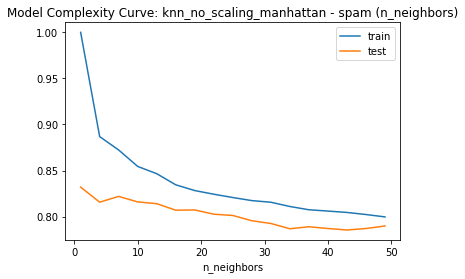

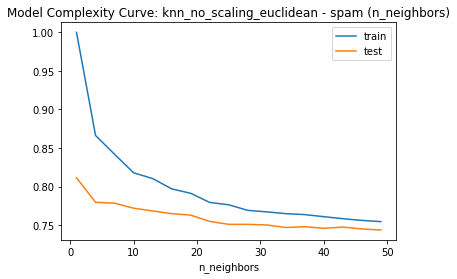

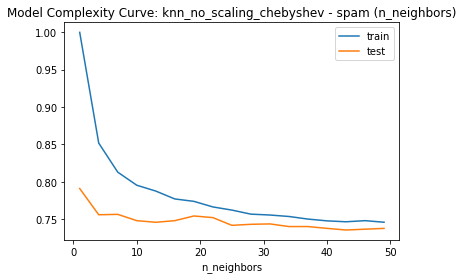

In [ ]:
for d in [knn_spam_noscale_manhattan, knn_spam_noscale_euclidean, knn_spam_noscale_chebyshev]:
    d.plot(title=d.name)

**n_neighbors with scaling**

In [ ]:
knn_adult_scale_manhattan = make_complexity_curve(Pipeline([('Scale',StandardScaler()),('KNN',KNeighborsClassifier(metric='manhattan'))]), X_adult_train.astype(float), y_adult_train.astype(float), "KNN__n_neighbors", np.arange(1,51,3),"knn_scaling_manhattan", "adult")
knn_adult_scale_euclidean = make_complexity_curve(Pipeline([('Scale',StandardScaler()),('KNN',KNeighborsClassifier(metric='euclidean'))]), X_adult_train.astype(float), y_adult_train.astype(float), "KNN__n_neighbors", np.arange(1,51,3),"knn_scaling_euclidean", "adult")
knn_adult_scale_chebyshev = make_complexity_curve(Pipeline([('Scale',StandardScaler()),('KNN',KNeighborsClassifier(metric='manhattan'))]), X_adult_train.astype(float), y_adult_train.astype(float), "KNN__n_neighbors", np.arange(1,51,3),"knn_scaling_chebyshev", "adult")

In [ ]:
for d in [knn_adult_scale_manhattan, knn_adult_scale_euclidean, knn_adult_scale_chebyshev]:
    d.plot(title=d.name)

In [54]:
knn_spam_scale_manhattan = make_complexity_curve(Pipeline([('Scale',StandardScaler()),('KNN',KNeighborsClassifier(metric='manhattan'))]), X_spam_train.astype(float), y_spam_train.astype(float), "KNN__n_neighbors", np.arange(1,51,3),"knn_scaling_manhattan", "spam")
knn_spam_scale_euclidean = make_complexity_curve(Pipeline([('Scale',StandardScaler()),('KNN',KNeighborsClassifier(metric='euclidean'))]), X_spam_train.astype(float), y_spam_train.astype(float), "KNN__n_neighbors", np.arange(1,51,3),"knn_scaling_euclidean", "spam")
knn_spam_scale_chebyshev = make_complexity_curve(Pipeline([('Scale',StandardScaler()),('KNN',KNeighborsClassifier(metric='manhattan'))]), X_spam_train.astype(float), y_spam_train.astype(float), "KNN__n_neighbors", np.arange(1,51,3),"knn_scaling_chebyshev", "spam")

In [ ]:
for d in [knn_spam_scale_manhattan, knn_spam_scale_euclidean, knn_spam_scale_chebyshev]:
    d.plot(title=d.name)

**Timing curve**

In [ ]:
adult_timing = make_timing_curve(adult_cv.best_estimator_,X_adult_train.astype(float), y_adult_train.astype(float),'knn-timing', 'adult')

In [ ]:
adult_timing.plot(title=adult_timing.name)

In [ ]:
spam_timing = make_timing_curve(spam_cv.best_estimator_,X_spam_train.astype(float), y_spam_train.astype(float),'knn-timing', 'spam')

In [ ]:
spam_timing.plot(title=spam_timing.name)

**Learning curve**

In [ ]:
adult_lc = make_learning_curve(adult_cv.best_estimator_,X_adult_train.astype(float), y_adult_train.astype(float),np.linspace(0.1, 1.0, 10),'knn', 'adult')

In [ ]:
adult_lc.plot(title=adult_lc.name)

In [ ]:
spam_lc = make_learning_curve(spam_cv.best_estimator_,X_spam_train.astype(float), y_spam_train.astype(float),np.linspace(0.1, 1.0, 10),'knn', 'spam')

In [ ]:
spam_lc.plot(title=spam_lc.name)

**Drop features**

In [59]:
rfc = RandomForestClassifier(random_state=1)
rfc.fit(X_adult_train, y_adult_train)
adult_features_by_importance = [t[0] for t in sorted(list(zip(adult_df_dummies.columns.values, rfc.feature_importances_)), key=lambda tup: tup[1], reverse=True)]


/usr/local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


['fnlwgt',
 'education-num',
 'age',
 'hours-per-week',
 'capital-gain',
 'relationship_Husband',
 'workclass_Federal-gov',
 'workclass_Private',
 'marital-status_Married-civ-spouse',
 'race_Black',
 'race_White',
 'native-country_India',
 'marital-status_Never-married',
 'race_Asian-Pac-Islander',
 'relationship_Unmarried',
 'occupation_Prof-specialty',
 'education_Doctorate',
 'occupation_Sales',
 'education_Some-college',
 'capital-loss',
 'education_Bachelors',
 'marital-status_Divorced',
 'education_Prof-school',
 'education_HS-grad',
 'sex_Female',
 'occupation_Protective-serv',
 'workclass_Self-emp-inc',
 'occupation_Craft-repair',
 'relationship_Wife',
 'education_Masters',
 'relationship_Own-child',
 'workclass_Self-emp-not-inc',
 'native-country_England',
 'native-country_Cuba',
 'occupation_Machine-op-inspct',
 'workclass_Local-gov',
 'occupation_Adm-clerical',
 'education_Assoc-voc',
 'marital-status_Married-AF-spouse',
 'relationship_Not-in-family',
 'sex_Male',
 'educatio

In [ ]:
sfm_spam = SelectFromModel(RandomForestClassifier(random_state=1),threshold='median')
sfm_spam.fit(X_spam_train, y_spam_train)
X_spam_train_filtered = sf_spam.transform(X_spam_train)